# PostgreSQL

In [25]:
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
from psycopg2 import sql

In [29]:
con = psycopg2.connect("user=postgres password=7776")
con.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
cursor = con.cursor()

In [36]:
# Смотрим существующие бд

cursor.execute('select datname from pg_database;')
databases = cursor.fetchall()
databases

[('postgres',), ('dataset',), ('template1',), ('template0',), ('insurance',)]

In [39]:
# Создаем базу данных с именем dima
dbname = 'dima'
cursor.execute(f'drop database {dbname}')
cursor.execute(f'create database {dbname};')

In [40]:
# Проверяем, что бд dima успешно создалась

cursor.execute('select datname from pg_database;')
databases = cursor.fetchall()
databases

[('postgres',),
 ('dataset',),
 ('template1',),
 ('template0',),
 ('insurance',),
 ('dima',)]

In [ ]:
con = psycopg2.connect(database='dima',user='postgres',password='7776')

In [66]:
# создание тестовой таблицы

left_table_name = 'test_left'
right_table_name = 'test_right'

cursor.execute(f'drop table if exists {left_table_name};')
cursor.execute(f'drop table if exists {right_table_name};')

query1 = f'''
    create table {left_table_name}(
        id serial primary key,
        first_name varchar(30),
        department_id int
    );
'''

query2 = f'''
    create table {right_table_name}(
        id serial primary key,
        name varchar(50)
    );
'''


cursor.execute(query1)
cursor.execute(query2)

In [67]:
# Проверяем только что созданную таблицу

cursor.execute('SELECT table_name FROM information_schema.tables;')
tables = cursor.fetchall()
tables

[('test',),
 ('orders',),
 ('phones',),
 ('messages',),
 ('pg_statistic',),
 ('pg_type',),
 ('pg_foreign_table',),
 ('test_left',),
 ('test_right',),
 ('pg_authid',),
 ('table_applications',),
 ('pg_shadow',),
 ('pg_statistic_ext_data',),
 ('pg_roles',),
 ('pg_settings',),
 ('pg_file_settings',),
 ('pg_hba_file_rules',),
 ('pg_config',),
 ('pg_shmem_allocations',),
 ('pg_backend_memory_contexts',),
 ('pg_available_extension_versions',),
 ('pg_user_mapping',),
 ('pg_stat_xact_user_functions',),
 ('pg_replication_origin_status',),
 ('pg_subscription',),
 ('pg_attribute',),
 ('pg_proc',),
 ('pg_class',),
 ('pg_attrdef',),
 ('pg_constraint',),
 ('pg_inherits',),
 ('pg_index',),
 ('pg_operator',),
 ('pg_opfamily',),
 ('pg_opclass',),
 ('pg_am',),
 ('pg_amop',),
 ('pg_amproc',),
 ('pg_language',),
 ('pg_stat_archiver',),
 ('pg_stat_bgwriter',),
 ('pg_stat_wal',),
 ('pg_stat_progress_analyze',),
 ('pg_stat_progress_vacuum',),
 ('pg_stat_progress_cluster',),
 ('pg_stat_progress_create_index',)

In [106]:
# Вставка

cursor.execute(f'delete from {right_table_name};')
cursor.execute(f'truncate {left_table_name};')

query1 = f'''
    insert into {right_table_name} values 
        (1, 'finance'),
        (2, 'marketing'),
        (3, 'production'),
        (5, 'nullable');
'''

query2 = f'''
    insert into {left_table_name}(id, first_name, department_id) values
        (1,'dima', 1),
        (2,'nastya', 2),
        (3,'semen', 3),
        (4,'grigory', 0),
        (5,'mark',4);
'''

cursor.execute(query1)
cursor.execute(query2)

In [103]:
# Выборка

cursor.execute(f'select * from {left_table_name};')
left_data = cursor.fetchall()
cursor.execute(f'select * from {right_table_name};')
right_data = cursor.fetchall()

print(left_data)
print(right_data)

[(1, 'dima', 1), (2, 'nastya', 2), (3, 'semen', 3), (4, 'grigory', 0), (5, 'mark', 4)]
[(1, 'finance'), (2, 'marketing'), (3, 'production')]


In [89]:
# Обновление

cursor.execute(f"update {left_table_name} set department_id=2 where first_name='mark'")

cursor.execute(f'select * from {left_table_name};')
left_data = cursor.fetchall()

print(left_data)



[(15, 'dima', 1), (16, 'nastya', 2), (17, 'semen', 3), (18, 'grigory', 0), (19, 'mark', 2)]


In [109]:
# Удаление

cursor.execute(f"delete from {left_table_name} where first_name='mark'")

cursor.execute(f'select * from {left_table_name};')
left_data = cursor.fetchall()

print(left_data)


[(1, 'dima', 1), (2, 'nastya', 2), (3, 'semen', 3), (4, 'grigory', 0)]


## Inner join - выбрать записи из таблиц, соединительные столбцы которых совпадают

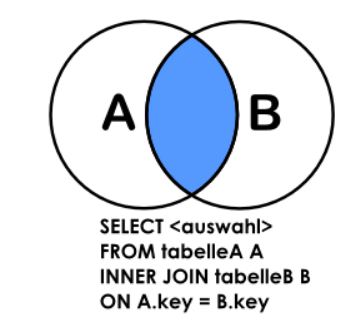

In [107]:
query = f'''
    select l.id, l.first_name, r.name
    from {left_table_name} l
    join {right_table_name} r
    on l.department_id = r.id;
'''

cursor.execute(query)
data = cursor.fetchall()
print(data)

# Результат - нет Георгия, id_department которого нет в правой таблице
# Также нет отдела nullable, т.к. в таблице сотрудников нет никого с таким отделом

[(1, 'dima', 'finance'), (2, 'nastya', 'marketing'), (3, 'semen', 'production')]


## left join 1
В результате получим абсолютно все записи из левой таблицы
даже при отсутствии совпадений с правой таблицы

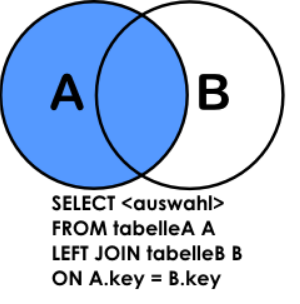

In [110]:
query = f'''
    select l.id, l.first_name, r.name
    from {left_table_name} l
    left join {right_table_name} r
    on l.department_id = r.id;
'''

cursor.execute(query)
data = cursor.fetchall()
print(data)

# Результат - есть Георгий, хотя у него нет отдела.
# Отдела nullable в результирующей выборке нет т.к. он есть в правой таблице, но не имеет связи с левой

[(1, 'dima', 'finance'), (2, 'nastya', 'marketing'), (3, 'semen', 'production'), (4, 'grigory', None)]


## left join 2
В результате получим только те записи левой таблицы, которые не пересекаются с правой таблицей

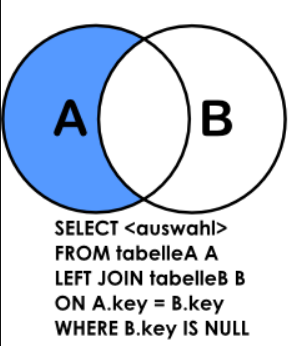

In [111]:
query = f'''
    select l.id, l.first_name, r.name
    from {left_table_name} l
    left join {right_table_name} r
    on l.department_id = r.id
    where r.id is null;
'''

cursor.execute(query)
data = cursor.fetchall()
print(data)

# Результат - только Георгий, потому что он единственный не имеет связи с правой таблицей

[(4, 'grigory', None)]


## right join 1

В результате получим все записи из таблицы, имеют они связь с левой таблицей или нет

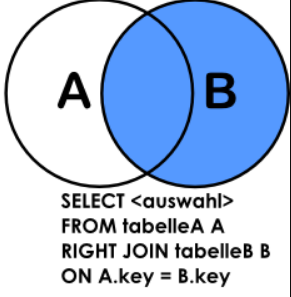

In [112]:
query = f'''
    select l.id, l.first_name, r.name
    from {left_table_name} l
    right join {right_table_name} r
    on l.department_id = r.id;
'''

cursor.execute(query)
data = cursor.fetchall()
print(data)

# Результат - получаем все записи, имеющие связь с правой таблицей, а также отдел nullable, который связей с левой таблицей не имеет

[(1, 'dima', 'finance'), (2, 'nastya', 'marketing'), (3, 'semen', 'production'), (None, None, 'nullable')]


## right join 2

В результате получим только те записи из правой таблицы, которые не имеют связи с левой таблицей

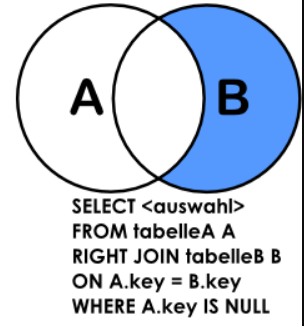

In [113]:
query = f'''
    select l.id, l.first_name, r.name
    from {left_table_name} l
    right join {right_table_name} r
    on l.department_id = r.id
    where l.department_id is null;
'''

cursor.execute(query)
data = cursor.fetchall()
print(data)

# Результат - только отдел nullable, который связи с левой таблицей не имеет  

[(None, None, 'nullable')]


## full outer join 1

В результате получим все записи, имеющие связь между двумя таблицами,
затем получаем оставшиеся записи из левой и правой таблиц, не имеющих связей.

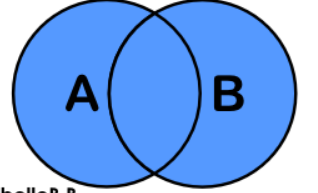

In [114]:
query = f'''
    select l.id, l.first_name, r.name
    from {left_table_name} l
    full outer join {right_table_name} r
    on l.department_id = r.id;
'''

cursor.execute(query)
data = cursor.fetchall()
print(data)

# Результат - 3 записи имеющие связь, отдел nullable из правой таблицы, не имеющий связи с левой таблицей
# и Григорий, не имеющий связи с правой таблицей. 

[(1, 'dima', 'finance'), (2, 'nastya', 'marketing'), (3, 'semen', 'production'), (None, None, 'nullable'), (4, 'grigory', None)]


## full outer join 2

В результате получим только те записи из двух таблиц, которых не имеют связей с другой таблицей

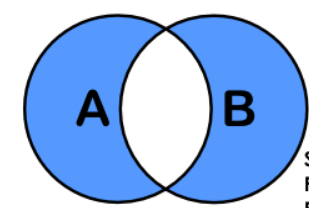

In [115]:
query = f'''
    select l.id, l.first_name, r.name
    from {left_table_name} l
    full outer join {right_table_name} r
    on l.department_id = r.id
    where l.department_id is null or r.id is null;
'''

cursor.execute(query)
data = cursor.fetchall()
print(data)

# Получили только отдел nullable и Григория, которые не имеют связи с противоположными таблицами

[(None, None, 'nullable'), (4, 'grigory', None)]


## Возможности psycopg2

In [116]:
# rowcount - количество полученных записей в результате запроса 

cursor.execute(f'select * from {left_table_name};')
data = cursor.rowcount

print(data)

4


In [121]:
# scroll(n) - передвинуть позицию текущей строки на n-количество строк

cursor.execute(f'select * from {left_table_name};')
print(cursor.rownumber)
cursor.scroll(1)
print(cursor.rownumber)

data = cursor.fetchone()
print(data)

0
1
(2, 'nastya', 2)


In [124]:
# arraysize - количество записей, которые вернет fetchmany()

cursor.execute(f'select * from {left_table_name};')
cursor.arraysize = 2
data = cursor.fetchmany()
print(data)

[(1, 'dima', 1), (2, 'nastya', 2)]


In [125]:
# query - посмотреть выполненный запрос

cursor.execute(f'select * from {left_table_name};')
data = cursor.query
print(data)

b'select * from test_left;'
